In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt 

In [20]:
import seaborn as sns

In [62]:
dict={"Names":["Avery","Rylan","Rowan","Kyrie","Lyric","River","Riley","Justice","Eden","Ellis"],
"Genders":["man","woman","man","woman","man","woman","man","woman","man","woman",],
"Hobbies":["Playing Piano","Singing","Drawing","Dancing","Sculpting","Workout","ESports","Swimming","Programming","Dancing"],
"PracticeHours":[1,2,3,4,5,6,7,8,7,5],
"PracticeTimeZone":["Evening","Evening","Evening","Night","Evening","Night","Night","Night","Night","Day"],
"SleepHours":[5,6,7,8,9,10,8,6,7,9]}
Data=pd.DataFrame(dict,index=[1,2,3,4,5,6,7,8,9,10])
Data

,Names,Genders,Hobbies,PracticeHours,PracticeTimeZone,SleepHours
1,Avery,man,Playing Piano,1,Evening,5
2,Rylan,woman,Singing,2,Evening,6
3,Rowan,man,Drawing,3,Evening,7
4,Kyrie,woman,Dancing,4,Night,8
5,Lyric,man,Sculpting,5,Evening,9
6,River,woman,Workout,6,Night,10
7,Riley,man,ESports,7,Night,8
8,Justice,woman,Swimming,8,Night,6
9,Eden,man,Programming,7,Night,7
10,Ellis,woman,Dancing,5,Day,9


(array([0., 1., 9.]), array([ 1,  3,  6, 10]), <a list of 3 Patch objects>)

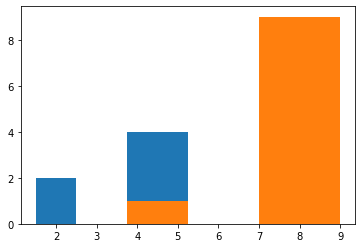

In [43]:
plt.hist(Data["PracticeHours"],bins=[1,3,6,10],rwidth=0.5)
plt.hist(Data["SleepHours"],bins=[1,3,6,10],rwidth=0.5)


([array([1., 1.]),
  array([1., 1.]),
  array([1., 1.]),
  array([1., 1.]),
  array([0., 2.]),
  array([0., 2.]),
  array([0., 2.]),
  array([0., 2.]),
  array([0., 2.]),
  array([0., 2.])],
 array([ 1,  5, 10]),
 <a list of 10 Lists of Patches objects>)

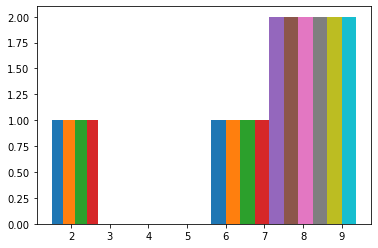

In [53]:
plt.hist(Data[["PracticeHours","SleepHours"]],bins=[1,5,10],rwidth=0.75)

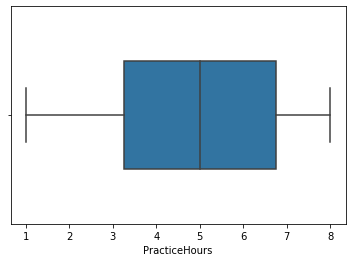

In [51]:
sns.boxplot(Data["PracticeHours"],width=0.5)

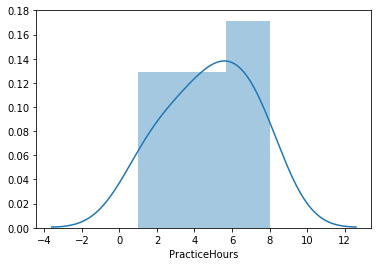

In [54]:
sns.distplot(Data["PracticeHours"])

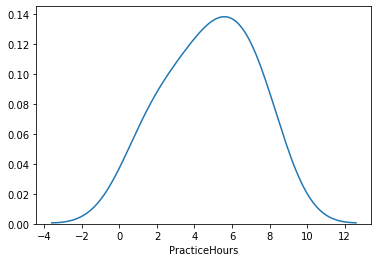

In [55]:
sns.distplot(Data["PracticeHours"],hist=False)

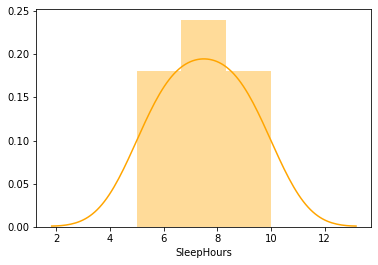

In [87]:
sns.distplot(Data["SleepHours"],color="orange")

Night      5
Evening    4
Day        1
Name: PracticeTimeZone, dtype: int64


Text(0.5, 1.0, 'histo1')

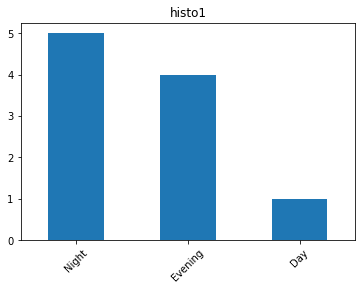

In [83]:
vc=(Data["PracticeTimeZone"]).value_counts()
print(vc)
vc.plot.bar(Data["PracticeTimeZone"],rot=45)
plt.title("histo1")

In [89]:
new_data=Data.drop(["Names","Genders","Hobbies","PracticeTimeZone"],axis=1)
new_data

,PracticeHours,SleepHours
1,1,5
2,2,6
3,3,7
4,4,8
5,5,9
6,6,10
7,7,8
8,8,6
9,7,7
10,5,9


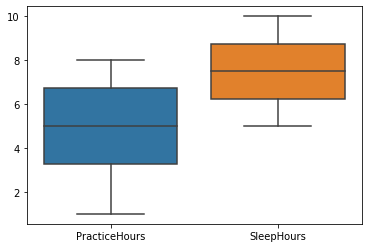

In [94]:
sns.boxplot(data=new_data)

In [95]:
from sklearn.preprocessing import StandardScaler

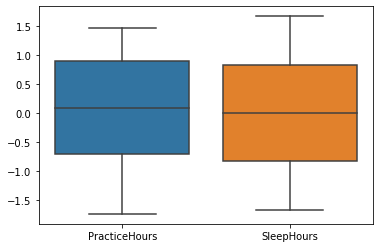

In [113]:
#standardization
scaler=StandardScaler()
new_data["PracticeHours"]=scaler.fit_transform(new_data[["PracticeHours"]].values)
new_data["SleepHours"]=scaler.fit_transform(new_data[["SleepHours"]].values)
sns.boxplot(data=new_data)

In [104]:
np.mean(new_data["PracticeHours"])

-1.0685896612017132e-16

In [106]:
np.median(new_data["PracticeHours"])

0.09166984970282104

In [109]:
np.std(new_data["PracticeHours"])

1.0

In [110]:
np.var(new_data["PracticeHours"])

1.0

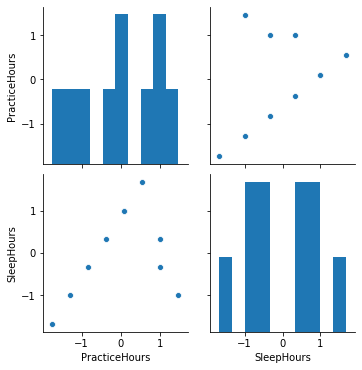

In [111]:
sns.pairplot(data=new_data)

In [112]:
new_data.corr()

,PracticeHours,SleepHours
PracticeHours,1.000000,0.397236
SleepHours,0.397236,1.000000


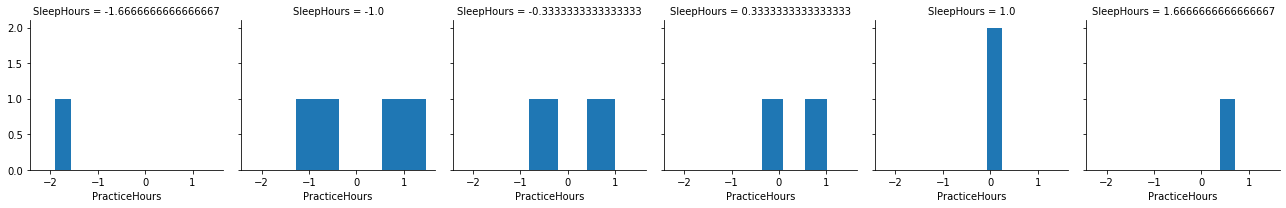

In [117]:
#correlation using seaborn
g=sns.FacetGrid(new_data,col="SleepHours")
g.map(plt.hist,"PracticeHours",bins=3)

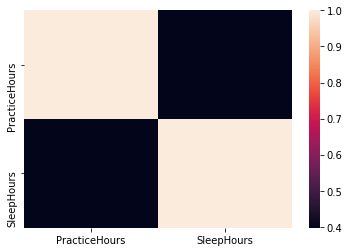

In [118]:
sns.heatmap(new_data.corr())

In [119]:
dict={"Names":["Avery","Rylan","Rowan","Kyrie","Lyric","River","Riley","Justice","Eden","Ellis"],
"Genders":["man","woman","man","woman","man","woman","man","woman","man","woman",],
"Hobbies":["Playing Piano","Singing","Drawing","Dancing","Sculpting","Workout","ESports","Swimming","Programming","Dancing"],
"PracticeHours":[1,2,3,4,5,6,7,8,7,5],
"PracticeTimeZone":["Evening","Evening","Evening","Night","Evening","Night","Night","Night","Night","Day"],
"SleepHours":[5,6,7,8,9,10,8,6,7,9]}
Data=pd.DataFrame(dict,index=[1,2,3,4,5,6,7,8,9,10])
Data

,Names,Genders,Hobbies,PracticeHours,PracticeTimeZone,SleepHours
1,Avery,man,Playing Piano,1,Evening,5
2,Rylan,woman,Singing,2,Evening,6
3,Rowan,man,Drawing,3,Evening,7
4,Kyrie,woman,Dancing,4,Night,8
5,Lyric,man,Sculpting,5,Evening,9
6,River,woman,Workout,6,Night,10
7,Riley,man,ESports,7,Night,8
8,Justice,woman,Swimming,8,Night,6
9,Eden,man,Programming,7,Night,7
10,Ellis,woman,Dancing,5,Day,9


In [120]:
#correlation using groupby(practicetimezone, practice hours )
Data[["PracticeTimeZone","PracticeHours"]].groupby(["PracticeTimeZone"],as_index=True).mean()

,PracticeHours
PracticeTimeZone,
Day,5.00
Evening,2.75
Night,6.40


In [121]:
#correlation using groupby (sleep hour,practicehours)
Data[["SleepHours","PracticeHours"]].groupby(["SleepHours"],as_index=True).mean()

,PracticeHours
SleepHours,
5,1.0
6,5.0
7,5.0
8,5.5
9,5.0
10,6.0
